In [4]:
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [2]:
top_words = 10000 # 가장 많이쓰이는 단어 10000개
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words = top_words)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test[0]) # 0=negative, 1=positive

/home/piai/anaconda3/envs/abc/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,)
(25000,)
(25000,)
0


/home/piai/anaconda3/envs/abc/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(x_train)
print(y_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [4]:
word_to_index = tf.keras.datasets.imdb.get_word_index()
# print(type(word_to_index))
# print(word_to_index)

index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

In [5]:
for i in range(5): # 제일 많이 쓰인 단어 5개
    print(index_to_word[i+4])

the
and
a
of
to


In [6]:
print(index_to_word[120])

over


The longest length of the review : 2494
The average length of the review : 238.71364


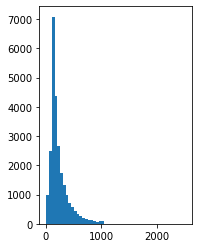

In [7]:
len_result = [len(s) for s in x_train]
#print(len_result)

print("The longest length of the review : {}".format(np.max(len_result)))
print("The average length of the review : {}".format(np.mean(len_result)))

plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

In [8]:
for index, token in enumerate(("<pad>","<sos>","<unk>")):
    index_to_word[index]=token
    
print(x_train[2])
print(' '.join([index_to_word[index] for index in x_train[2]]))
print(y_train[2])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 2, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 2, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]
<sos> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actu

In [9]:
max_len = 200
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len) # 단어가 200개가 넘어가면 자른다.
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [10]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc1 = tf.keras.callbacks.ModelCheckpoint('./data_files/rnn_test', monitor='val_accuracy', mode='max', verbose=1, save_freq='epoch', save_best_only=True)
mc2 = tf.keras.callbacks.ModelCheckpoint('./data_files/lstm_test', monitor='val_accuracy', mode='max', verbose=1, save_freq='epoch', save_best_only=True)

In [11]:
rnn = tf.keras.Sequential() # sequence의 길이 max_len(200개) 일정하게 맞춰줌           
rnn.add(layers.Embedding(top_words, 150)) # 10000, 150 => 10000개의 단어가 있는데 150(벡터)으로 embedding시킴
                                              #           예를들어 one-hot인코딩 하면 10000개의 차원이 생김(각단어의 연관성 없음)
                                              #           각단어의 연관성을 고려해서 150개정도의 벡터에서 10000개의 단어를 표현
rnn.add(layers.SimpleRNN(64))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.summary()

# (None, None, 200)         1500000 = 150*10000  => 단어하나당 150개의 weight * 10000개의 단어

# ht = tanh(Wxh*Xt + Whh*ht-1 + b)
#           64*150 + 64*64 + 64
#           총 param 13760개
# dense = Wh + b = 1*64 + 1 = 65

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 150)         1500000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                13760     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,513,825
Trainable params: 1,513,825
Non-trainable params: 0
_________________________________________________________________


In [12]:
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
result = rnn.fit(x_train, y_train, epochs=5, callbacks=[es, mc1], batch_size=60, validation_split=0.2)

Epoch 1/5
334/334 [==============================] - ETA: 0s - loss: 0.6042 - accuracy: 0.6587
Epoch 00001: val_accuracy improved from -inf to 0.66380, saving model to ./data_files/rnn_test
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./data_files/rnn_test/assets
334/334 [==============================] - 38s 113ms/step - loss: 0.6042 - accuracy: 0.6587 - val_loss: 0.6093 - val_accuracy: 0.6638
Epoch 2/5
334/334 [==============================] - ETA: 0s - loss: 0.4561 - accuracy: 0.7869
Epoch 00002: val_accuracy improved from 0.66380 to 0.73620, saving model to ./data_files/rnn_test
INFO:tensorflow:Assets written to: ./data_files/rnn_test/assets
334/334 [==============================] - 37s 112ms/step - loss: 0.4561 - accuracy: 0.7869 - val_loss: 0.5480 - val_accuracy: 0.7362
Epoch 3/5
334/334 [==============================] - ETA: 0s - loss: 0.2196 - accuracy: 0.9169
Epoch 00003: val_accuracy improved from 0.736

In [13]:
rnn.evaluate(x_test, y_test) # [loss, accuracy]

782/782 [==============================] - 15s 19ms/step - loss: 0.7713 - accuracy: 0.7607


[0.7713456749916077, 0.7606800198554993]

In [14]:
loaded_model = tf.keras.models.load_model('data_files/rnn_test')
print(loaded_model.evaluate(x_test,y_test))

782/782 [==============================] - 15s 19ms/step - loss: 0.5113 - accuracy: 0.8133
[0.5113013982772827, 0.813319981098175]


In [15]:
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences

def sentiment_predict(new_sentence):
    # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
    new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()

    # 정수 인코딩
    encoded = []
    for word in new_sentence.split():
    # 단어 집합의 크기를 10,000으로 제한.
        try :
            if word_to_index[word] <= 10000:
                encoded.append(word_to_index[word]+3)
            else:
        # 10,000 이상의 숫자는 <unk> 토큰으로 취급.
                encoded.append(2)
        # 단어 집합에 없는 단어는 <unk> 토큰으로 취급.
        except KeyError:
            encoded.append(2)

    pad_new = pad_sequences([encoded], maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("positive with the probability {:.2f}% .".format(score * 100))
    else:
        print("negative with the probability {:.2f}% ".format((1 - score) * 100))

In [49]:
my_review="Hello this is the best movie i have ever seen, but it was just before the end of the movie. The last scene was really disgusting"
sentiment_predict(my_review)

positive with the probability 61.79% .


In [17]:
lstm = tf.keras.Sequential()
lstm.add(layers.Embedding(top_words, 100))
lstm.add(layers.LSTM(64))
lstm.add(layers.Dense((2), activation='softmax')) # 0, 1 
lstm.summary()

# (None, None, 100)         1000000 = 100*10000  => 단어하나당 100개의 weight * 10000개의 단어

# ht = tanh(Wxh*Xt + Whh*ht-1 + b) * f, i, c, o
#           (64*100 + 64*64 + 64) * 4
#           총 param 42240개
# dense = Wh + b = 1*64 + 1 = 65

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 1,042,370
Trainable params: 1,042,370
Non-trainable params: 0
_________________________________________________________________


In [18]:
lstm.compile(optimizer ='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Train LSTM")

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1, stratify=y_train) #y_train값의 값을 기준으로

lstm.fit(x_train, y_train, epochs=5, callbacks=[es, mc2], batch_size=16, validation_data=(x_val, y_val))

Train LSTM
Epoch 1/5
1248/1250 [============================>.] - ETA: 0s - loss: 0.4337 - accuracy: 0.7985
Epoch 00001: val_accuracy improved from -inf to 0.83120, saving model to ./data_files/lstm_test
INFO:tensorflow:Assets written to: ./data_files/lstm_test/assets
1250/1250 [==============================] - 24s 19ms/step - loss: 0.4336 - accuracy: 0.7986 - val_loss: 0.4350 - val_accuracy: 0.8312
Epoch 2/5
1249/1250 [============================>.] - ETA: 0s - loss: 0.2707 - accuracy: 0.8912
Epoch 00002: val_accuracy improved from 0.83120 to 0.86420, saving model to ./data_files/lstm_test
INFO:tensorflow:Assets written to: ./data_files/lstm_test/assets
1250/1250 [==============================] - 23s 18ms/step - loss: 0.2708 - accuracy: 0.8911 - val_loss: 0.3256 - val_accuracy: 0.8642
Epoch 3/5
1249/1250 [============================>.] - ETA: 0s - loss: 0.1794 - accuracy: 0.9333
Epoch 00003: val_accuracy improved from 0.86420 to 0.87280, saving model to ./data_files/lstm_test
INFO

In [19]:
lstm.evaluate(x_test, y_test)

782/782 [==============================] - 5s 7ms/step - loss: 0.5642 - accuracy: 0.8576


[0.5642160177230835, 0.8575999736785889]

In [20]:
loaded_model_lstm = tf.keras.models.load_model('data_files/lstm_test')
print(loaded_model_lstm.evaluate(x_test,y_test))

782/782 [==============================] - 5s 7ms/step - loss: 0.3863 - accuracy: 0.8613
[0.3863230049610138, 0.8612800240516663]


In [21]:
multi_lstm = tf.keras.Sequential()
multi_lstm.add(layers.Embedding(top_words, 160))
multi_lstm.add(layers.LSTM(64, return_sequences=True))
multi_lstm.add(layers.LSTM(64))
multi_lstm.add(layers.Dense(2, activation='softmax'))

multi_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Train: Multi_LSTM")
multi_lstm.fit(x_train, y_train, epochs=5, batch_size=60, validation_data=(x_val, y_val))

Train: Multi_LSTM
Epoch 1/5
334/334 [==============================] - 11s 33ms/step - loss: 0.4062 - accuracy: 0.8111 - val_loss: 0.3567 - val_accuracy: 0.8582
Epoch 2/5
334/334 [==============================] - 10s 31ms/step - loss: 0.2396 - accuracy: 0.9072 - val_loss: 0.2989 - val_accuracy: 0.8786
Epoch 3/5
334/334 [==============================] - 10s 30ms/step - loss: 0.1524 - accuracy: 0.9445 - val_loss: 0.3856 - val_accuracy: 0.8728
Epoch 4/5
334/334 [==============================] - 10s 30ms/step - loss: 0.1132 - accuracy: 0.9610 - val_loss: 0.4109 - val_accuracy: 0.8384
Epoch 5/5
334/334 [==============================] - 10s 30ms/step - loss: 0.1024 - accuracy: 0.9636 - val_loss: 0.4474 - val_accuracy: 0.8640


In [22]:
multi_lstm.evaluate(x_test, y_test)

782/782 [==============================] - 9s 11ms/step - loss: 0.5022 - accuracy: 0.8475


[0.5022159218788147, 0.8475199937820435]

In [23]:
bi_lstm = tf.keras.Sequential()
bi_lstm.add(layers.Embedding(top_words, 160))

lstm_fw = layers.LSTM(64)
lstm_bw = layers.LSTM(64, go_backwards=True)

bi_lstm.add(layers.Bidirectional(lstm_fw, backward_layer=lstm_bw))
bi_lstm.add(layers.Dense(2, activation='softmax'))

In [24]:
bi_lstm.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
print("Train: Bidirectional_LSTM")
bi_lstm.fit(x_train, y_train, epochs=5, batch_size=60, validation_data=(x_val, y_val))

Train: Bidirectional_LSTM
Epoch 1/5
334/334 [==============================] - 11s 32ms/step - loss: 0.4001 - accuracy: 0.8065 - val_loss: 0.2962 - val_accuracy: 0.8784
Epoch 2/5
334/334 [==============================] - 10s 31ms/step - loss: 0.2255 - accuracy: 0.9137 - val_loss: 0.3830 - val_accuracy: 0.8436
Epoch 3/5
334/334 [==============================] - 10s 30ms/step - loss: 0.1478 - accuracy: 0.9451 - val_loss: 0.3576 - val_accuracy: 0.8698
Epoch 4/5
334/334 [==============================] - 10s 30ms/step - loss: 0.0951 - accuracy: 0.9664 - val_loss: 0.4772 - val_accuracy: 0.8668
Epoch 5/5
334/334 [==============================] - 10s 30ms/step - loss: 0.0831 - accuracy: 0.9720 - val_loss: 0.4606 - val_accuracy: 0.8562


In [25]:
bi_lstm.evaluate(x_test, y_test)

782/782 [==============================] - 9s 11ms/step - loss: 0.4717 - accuracy: 0.8490


[0.47171133756637573, 0.8489599823951721]